<h1><center>A Win/Lose prediction model of Premierleague games</center></h1>

<img src='premier.jpg' width="500">

## Contents

- EDA
- Preprocessing
- Modeling
- Evaluation

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import *

In [2]:
# scale
from sklearn.preprocessing import scale
# one-hot-encoding
from sklearn.preprocessing import OneHotEncoder
# random Forest
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# make confusion matrix
from sklearn.metrics import *

---

## 1. EDA (Exploratory Data Analysis)

In [3]:
# load data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
# check shape
print('train shape :', train.shape) # 12 - 16 season
print('test shape :', test.shape) # 17 season

train shape : (3800, 14)
test shape : (760, 14)


In [5]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 14 columns):
Team          3800 non-null object
Possession    3800 non-null float64
SOT           3800 non-null int64
Shots         3800 non-null int64
Touches       3800 non-null int64
Passes        3800 non-null int64
Tackles       3800 non-null int64
Clearances    3800 non-null int64
Corners       3800 non-null int64
Offsides      3800 non-null int64
Goal          3800 non-null int64
Year          3800 non-null int64
Home          3800 non-null int64
Result        3800 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 415.7+ KB


In [6]:
# Unique
print('train unique 갯수')
for i in range(14):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
Team : 28개
Possession : 509개
SOT : 18개
Shots : 40개
Touches : 536개
Passes : 530개
Tackles : 37개
Clearances : 77개
Corners : 20개
Offsides : 13개
Goal : 9개
Year : 5개
Home : 2개
Result : 3개


win 횟수 : 1430
lose 횟수 : 1430
draw 횟수 : 940


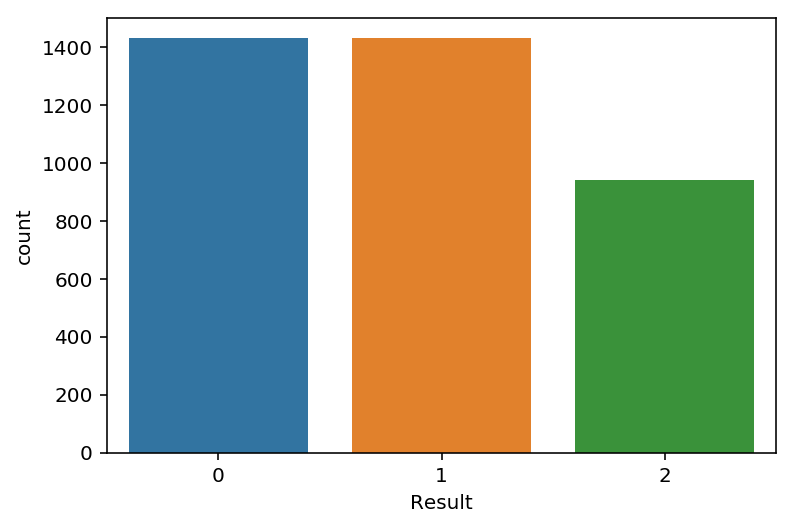

In [7]:
# y_data
print('win 횟수 :', len(train[train['Result'] == 0]))
print('lose 횟수 :', len(train[train['Result'] == 1]))
print('draw 횟수 :', len(train[train['Result'] == 2]))

sns.countplot(x = 'Result', data = train)
plt.show()

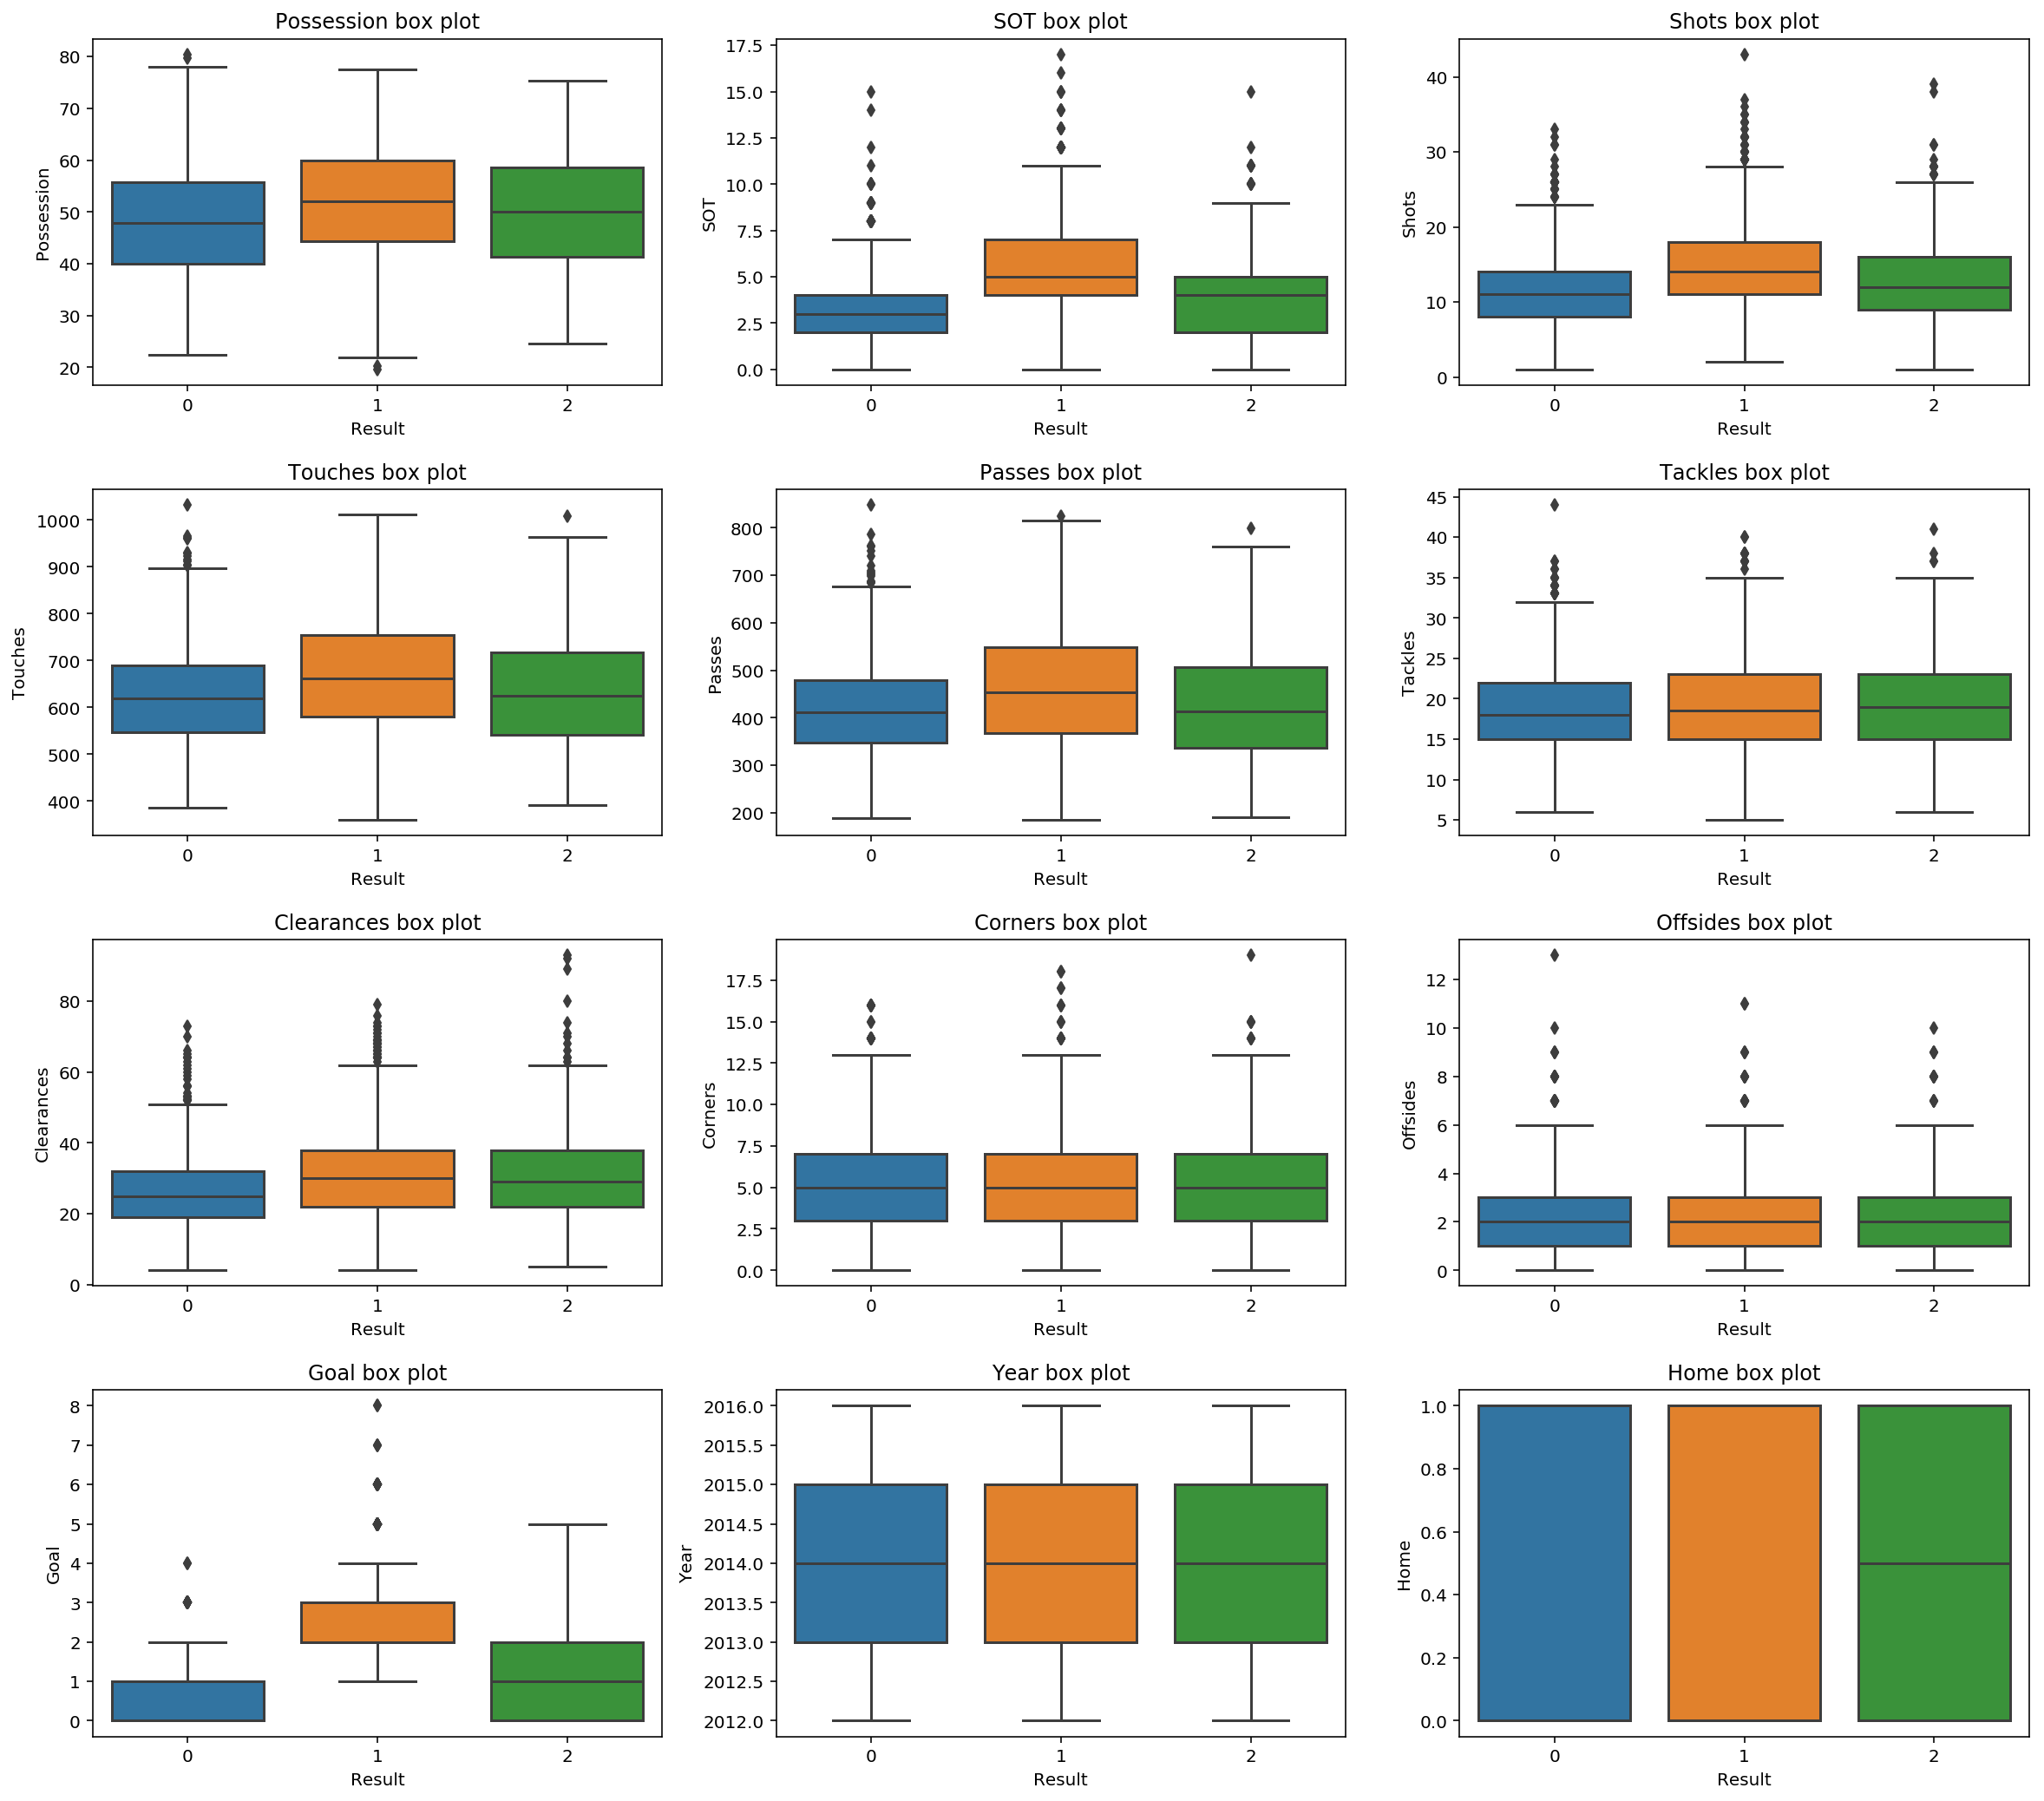

In [8]:
# feature boxplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 12+1) :
    plt.subplot(4, 3, i)
    sns.boxplot(x = train['Result'], y = train[train.columns[i]], data = train)
    plt.title('{} box plot'.format(train.columns[i]))

In [9]:
# 숫자화
train.groupby('Result').mean()

,Possession,SOT,Shots,Touches,Passes,Tackles,Clearances,Corners,Offsides,Goal,Year,Home
Result,,,,,,,,,,,,
0,48.21049,3.332168,11.613287,622.753846,419.338462,18.664336,26.413287,5.116783,2.083916,0.569231,2014.013287,0.397902
1,51.78951,5.686713,15.025175,668.597902,460.858741,18.975524,31.094406,5.633566,2.179720,2.390210,2014.013287,0.602098
2,50.00000,3.969149,12.863830,635.107447,425.311702,19.030851,30.526596,5.417021,2.080851,1.008511,2013.959574,0.500000


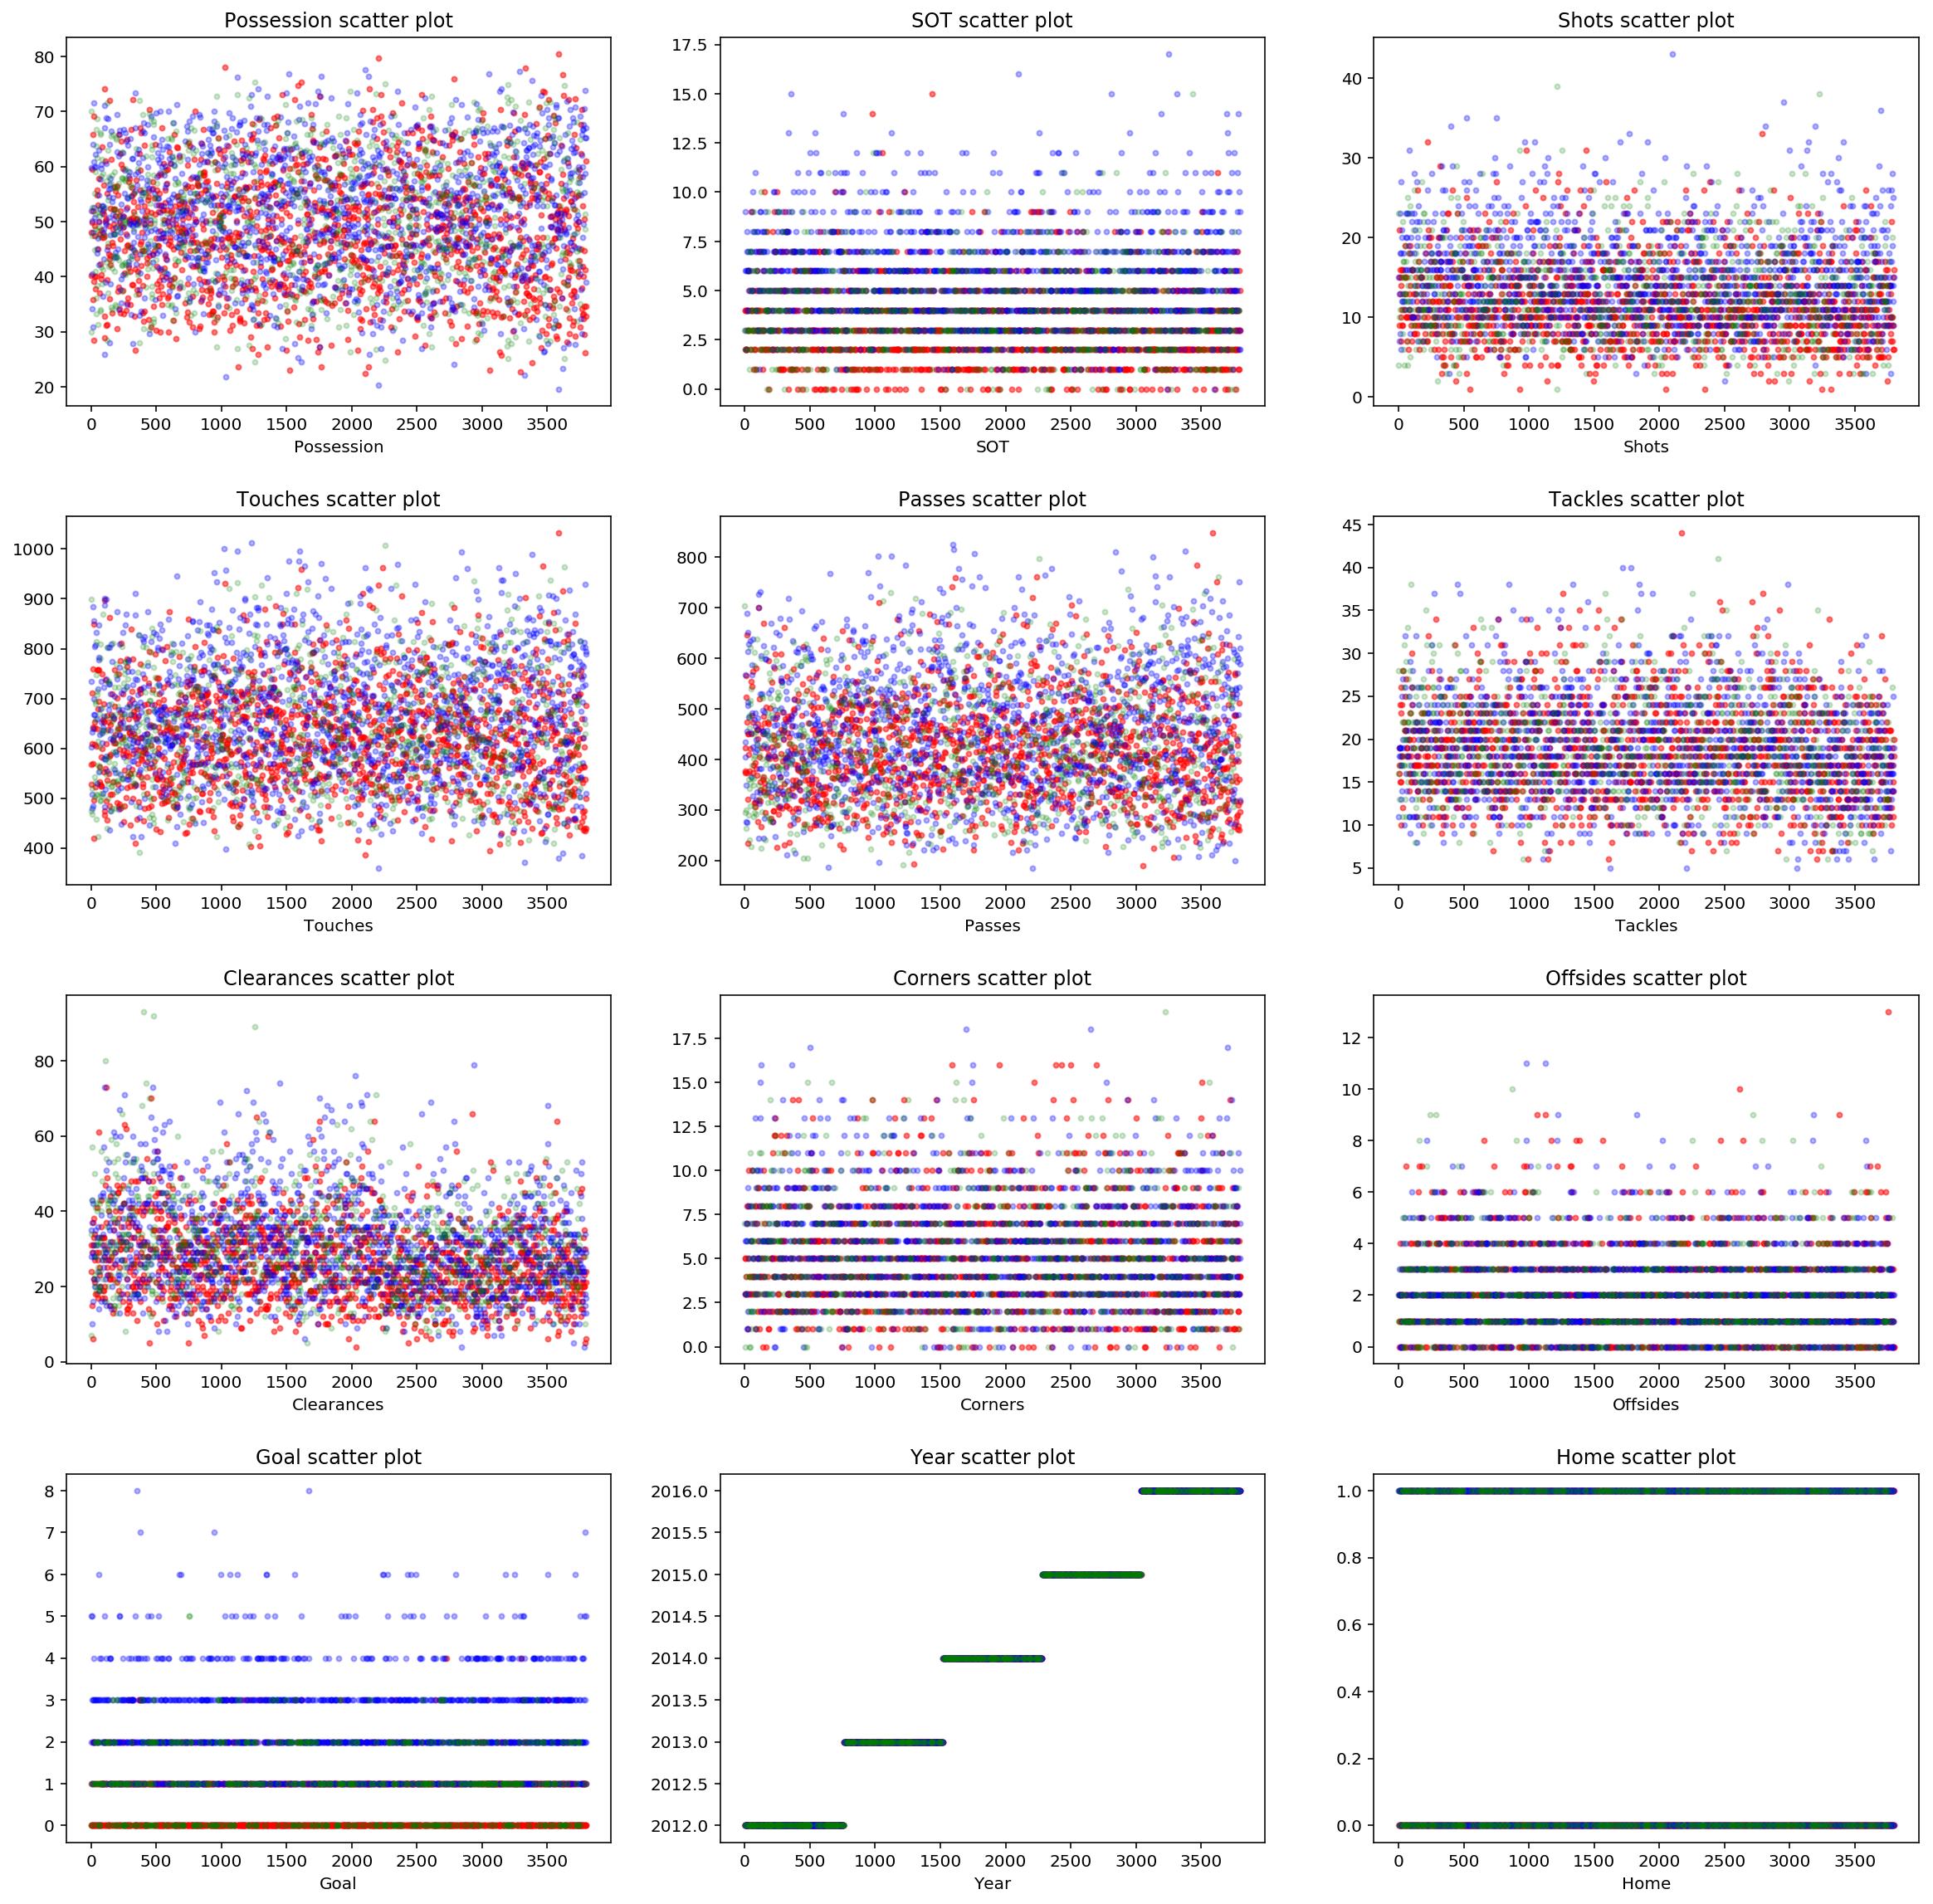

In [10]:
# scatter plot
result0 = train[train['Result'] == 0]
result1 = train[train['Result'] == 1]
result2 = train[train['Result'] == 2]


# feature scatter plot
plt.figure(figsize=(20, 20))
subplots_adjust(hspace = 0.3)

for i in range(1, 12+1) :
    plt.subplot(4, 3, i)
    plt.plot(result0[result0.columns[i]], 'ro', alpha = 0.5, markersize = 3)
    plt.plot(result1[result1.columns[i]], 'bo', alpha = 0.3, markersize = 3)
    plt.plot(result2[result2.columns[i]], 'go', alpha = 0.2, markersize = 3)
    plt.title('{} scatter plot'.format(result0.columns[i]))
    plt.xlabel(result0.columns[i])

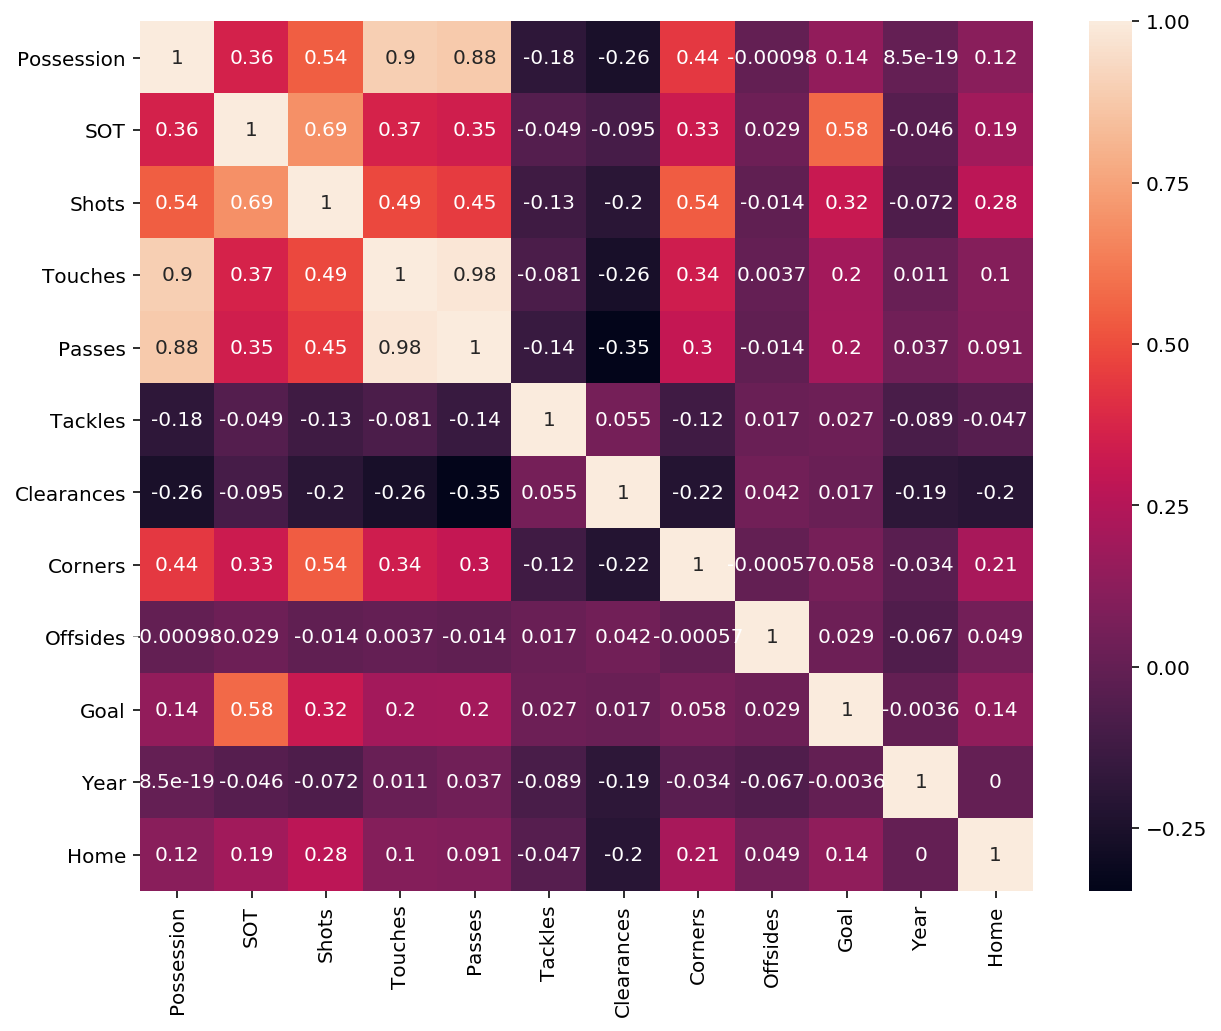

In [11]:
# correlation
correlation = train.drop(['Team', 'Result'], axis = 1)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation.corr(), annot=True)
plt.show()

---

In [12]:
# Unique
print('train unique 갯수')
for i in range(14):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
Team : 28개
Possession : 509개
SOT : 18개
Shots : 40개
Touches : 536개
Passes : 530개
Tackles : 37개
Clearances : 77개
Corners : 20개
Offsides : 13개
Goal : 9개
Year : 5개
Home : 2개
Result : 3개


In [47]:
# Unique
print('test unique 갯수')
for i in range(14):
    print('{} : {}개'.format(test.columns[i], len(set(test[test.columns[i]]))))

test unique 갯수
Team : 20개
Possession : 390개
SOT : 16개
Shots : 34개
Touches : 397개
Passes : 388개
Tackles : 30개
Clearances : 56개
Corners : 17개
Offsides : 12개
Goal : 8개
Year : 1개
Home : 2개
Result : 3개


## 2. Preprocessing

In [1]:
# continue, category 데이터 분리
continuous = ['Possession', 'Shots', 'Touches', 'Passes', 'Tackles', 'Clearances', 'Corners', 'SOT', 'Offsides', 'Goal']
categoricals = ['Home']

# train data
con_train = train[continuous]
cat_train = train[categoricals]

# test data
con_test = test[continuous]
cat_test = test[categoricals]

NameError: name 'train' is not defined

In [35]:
# scale (continue)
ls1 = []
ls2 = []

for i in range(7): 
    
    ls1.append((scale(pd.DataFrame(con_train[con_train.columns[i]]))))
    ls2.append((scale(pd.DataFrame(con_test[con_test.columns[i]]))))

# list 정렬
con_train = np.hstack(tuple(each for each in ls1))
con_test = np.hstack(tuple(each for each in ls2))

In [36]:
# one-hot-encoding (category)
ohe1 = OneHotEncoder()
ohe2 = OneHotEncoder()

# train data
ohe1.fit(cat_train)
ohe2.fit(cat_test)

# test data
cat_train = ohe1.transform(cat_train).toarray()
cat_test = ohe2.transform(cat_test).toarray()

In [37]:
# X_train (con, cat)
X_train = []
X_train.append(con_train)
X_train.append(cat_train)
X_train = np.hstack(tuple(each for each in X_train))

# X_test (con, cat)
X_test = []
X_test.append(con_test)
X_test.append(cat_test)
X_test = np.hstack(tuple(each for each in X_test))

# y_data
y_train = train['Result']
y_true = test['Result']

## 3. Modeling

In [41]:
# RandomForest
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 10, criterion = 'entropy')
model = clf.fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)

In [42]:
y_pred = []
for i in range(760) :
    y_pred.append(np.argmax(predict_proba[i]))

---

In [50]:
import xgboost
model_xgb = xgboost.XGBClassifier(n_estimators=1000, max_depth=2)
model_xgb.fit(X_train, y_train)
predict_proba = model_xgb.predict_proba(X_test)

In [51]:
# comparison
y_true = test['Result']
y_pred = []
for i in range(760) :
    y_pred.append(np.argmax(predict_proba[i]))

In [52]:
confusion_matrix(y_true, y_pred)

array([[193,  66,  22],
       [ 57, 193,  31],
       [ 82,  89,  27]])

In [53]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.58      0.69      0.63       281
    class 1       0.55      0.69      0.61       281
    class 2       0.34      0.14      0.19       198

avg / total       0.51      0.54      0.51       760



---

## 4. Evaluation

- Confusion Matrix
- ROC Curve
- AUC

#### 4.1 Confusion Matrix

In [43]:
confusion_matrix(y_true, y_pred)

array([[188,  72,  21],
       [ 52, 215,  14],
       [ 76, 108,  14]])

In [44]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.59      0.67      0.63       281
    class 1       0.54      0.77      0.64       281
    class 2       0.29      0.07      0.11       198

avg / total       0.50      0.55      0.50       760



#### 4.2 ROC (Receiver Operator Characteristic)

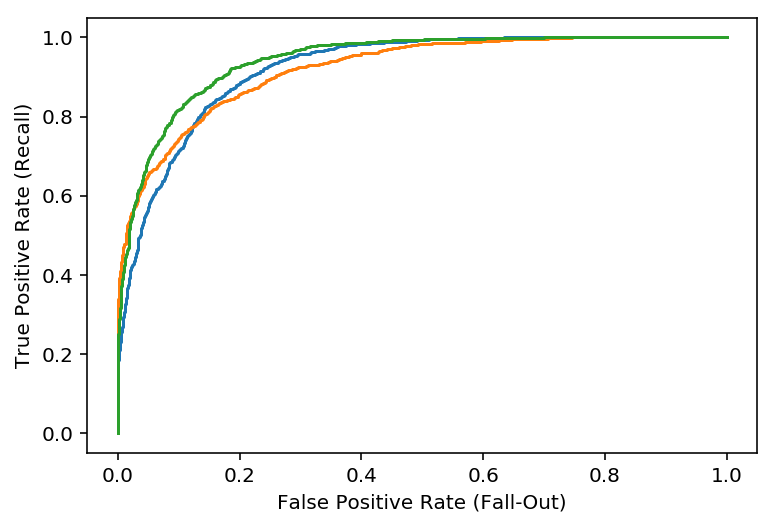

In [45]:
from sklearn.preprocessing import label_binarize
X = X_train
y = label_binarize(y_train, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = clf.fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

#### 4.3 AUC (Area Under the Curve)

In [46]:

auc(fpr[0], tpr[0]), auc(fpr[1], tpr[1]), auc(fpr[2], tpr[2])

(0.9224888613496209, 0.9211622554660529, 0.9437014581163516)